In [240]:
___Author___='LumberJack Jyss'

In [241]:
print('LumberJack BRUTAL AtidotCom XGBOOST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom XGBOOST
LumberJack Jyss (c)


In [242]:
print('Importation des librairies...')
import statistics
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
import seaborn as sns

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [243]:
#df = pd.read_csv('gbpjpy.csv')
df = pd.read_csv('dataset_Ruled.csv')

In [244]:
df = df.dropna()
#df.iloc[0].column=['Date']
#df = df.drop(['Open_spy','High_spy','Low_spy'],axis=1)

In [245]:
df.head()

,Date,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD,short_eurusd,long_eurusd
0,20180507 06:45:00,0.000135,0.000330,-0.000113,0.880000,0.228571,1.054639,1.196356,1.196592,1.196020,1,0
1,20180507 07:00:00,0.000490,0.000760,-0.000410,1.510638,1.000000,0.256579,1.196081,1.196496,1.195530,1,0
2,20180507 07:15:00,0.000630,0.000765,-0.000527,0.237288,0.005814,0.087099,1.195687,1.196351,1.194900,1,0
3,20180507 07:30:00,0.000065,0.000820,-0.000054,-0.773973,0.063584,0.076651,1.195403,1.196213,1.194835,1,0
4,20180507 07:45:00,-0.000395,0.000520,0.000331,-2.787879,-0.326087,59.345655,1.195345,1.196124,1.195230,1,0


In [246]:
df.set_index('Date', inplace=True)
df.head()

,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD,short_eurusd,long_eurusd
Date,,,,,,,,,,,
20180507 06:45:00,0.000135,0.000330,-0.000113,0.880000,0.228571,1.054639,1.196356,1.196592,1.196020,1,0
20180507 07:00:00,0.000490,0.000760,-0.000410,1.510638,1.000000,0.256579,1.196081,1.196496,1.195530,1,0
20180507 07:15:00,0.000630,0.000765,-0.000527,0.237288,0.005814,0.087099,1.195687,1.196351,1.194900,1,0
20180507 07:30:00,0.000065,0.000820,-0.000054,-0.773973,0.063584,0.076651,1.195403,1.196213,1.194835,1,0
20180507 07:45:00,-0.000395,0.000520,0.000331,-2.787879,-0.326087,59.345655,1.195345,1.196124,1.195230,1,0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24450 entries, 20180507  06:45:00 to 20190506  00:00:00
Data columns (total 11 columns):
oc_eurusd       24450 non-null float64
hl_eurusd       24450 non-null float64
eurusd_close    24450 non-null float64
eurusd_Doc      24450 non-null float64
eurusd_Dhl      24450 non-null float64
rsi_eurusd      24450 non-null float64
ema5_eurusd     24450 non-null float64
ema21_eurusd    24450 non-null float64
EURUSD          24450 non-null float64
short_eurusd    24450 non-null int64
long_eurusd     24450 non-null int64
dtypes: float64(9), int64(2)
memory usage: 2.2+ MB


In [248]:
sum(df['short_eurusd']),sum(df['long_eurusd'])

(6019, 6521)

In [249]:
delta = df.shape[0]
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta,'périodes')
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' périodes \nBloc 2 :',bloc2,' périodes')

Période d'étude :  24450 périodes
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  19560  périodes 
Bloc 2 : 4890  périodes


In [250]:
df['long_eurusd'].sum(),df['short_eurusd'].sum()

(6521, 6019)

In [251]:
df.head()

,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD,short_eurusd,long_eurusd
Date,,,,,,,,,,,
20180507 06:45:00,0.000135,0.000330,-0.000113,0.880000,0.228571,1.054639,1.196356,1.196592,1.196020,1,0
20180507 07:00:00,0.000490,0.000760,-0.000410,1.510638,1.000000,0.256579,1.196081,1.196496,1.195530,1,0
20180507 07:15:00,0.000630,0.000765,-0.000527,0.237288,0.005814,0.087099,1.195687,1.196351,1.194900,1,0
20180507 07:30:00,0.000065,0.000820,-0.000054,-0.773973,0.063584,0.076651,1.195403,1.196213,1.194835,1,0
20180507 07:45:00,-0.000395,0.000520,0.000331,-2.787879,-0.326087,59.345655,1.195345,1.196124,1.195230,1,0


In [252]:
Xtrain_long = df.iloc[:bloc1,:9]
#Xtrain_long = Xtrain_long.drop(['short'],axis=1)
Xtest_long = df.iloc[bloc1:,:9]
#Xtest_long = Xtest_long.drop(['short'],axis=1)
ytrain_long = df.iloc[:bloc1,10]
ytest_long = df.iloc[bloc1:,10]

In [253]:
Xtrain_long.head()

,oc_eurusd,hl_eurusd,eurusd_close,eurusd_Doc,eurusd_Dhl,rsi_eurusd,ema5_eurusd,ema21_eurusd,EURUSD
Date,,,,,,,,,
20180507 06:45:00,0.000135,0.000330,-0.000113,0.880000,0.228571,1.054639,1.196356,1.196592,1.196020
20180507 07:00:00,0.000490,0.000760,-0.000410,1.510638,1.000000,0.256579,1.196081,1.196496,1.195530
20180507 07:15:00,0.000630,0.000765,-0.000527,0.237288,0.005814,0.087099,1.195687,1.196351,1.194900
20180507 07:30:00,0.000065,0.000820,-0.000054,-0.773973,0.063584,0.076651,1.195403,1.196213,1.194835
20180507 07:45:00,-0.000395,0.000520,0.000331,-2.787879,-0.326087,59.345655,1.195345,1.196124,1.195230


In [254]:
ytest_long.head()

Date
20190221  11:00:00    0
20190221  11:15:00    0
20190221  11:30:00    1
20190221  11:45:00    1
20190221  12:00:00    1
Name: long_eurusd, dtype: int64

In [255]:
ytrain_long.sum(),ytest_long.sum(),ytrain_short.sum(),ytest_short.sum()

(5649, 872, 22568.982920000002, 5513.6657749999995)

In [256]:
Xtrain_short = df.iloc[:bloc1,:9]
#Xtrain_short = Xtrain_short.drop(['short_eurusd'],axis=1)
Xtest_short = df.iloc[bloc1:,:9]
#Xtest_short = Xtest_short.drop(['short_eurusd'],axis=1)
ytrain_short = df.iloc[:bloc1,9]
ytest_short = df.iloc[bloc1:,9]
print('Split effectué')

Split effectué


In [257]:
ytrain_long.shape,Xtrain_long.shape,Xtest_long.shape,ytest_long.shape

((19560,), (19560, 9), (4890, 9), (4890,))

In [258]:
ytrain_short.sum(),ytest_short.sum()

(5196, 823)

In [259]:
model_long = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)

In [260]:
model_short = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)

In [261]:
eval_set_long=[(Xtrain_long, ytrain_long), (Xtest_long, ytest_long)]

In [262]:
eval_set_short=[(Xtrain_short, ytrain_short), (Xtest_short, ytest_short)]

In [263]:
model_long.fit( Xtrain_long, ytrain_long, eval_metric=['auc','error','logloss'], eval_set=eval_set_long, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [264]:
model_short.fit( Xtrain_short, ytrain_short, eval_metric=['auc','error','logloss'], eval_set=eval_set_short, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [265]:
predictions_long = model_long.predict(Xtest_long)
accuracy_long = accuracy_score(ytest_long, predictions_long)
precision_long=precision_score(ytest_long, predictions_long) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_long=recall_score(ytest_long, predictions_long) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_long=roc_auc_score(ytest_long,predictions_long)
print('RESULTATS LONG\n')
print('Accuracy: %.2f%%' % (accuracy_long * 100.0))
print("Precision: %.2f%% " % (precision_long *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_long * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("AUC: %.2f%% " % (roc_long *100))
# get probabilities for positive class
prediction_long = model_long.predict_proba(Xtest_long)
roc_long2 = roc_auc_score(ytest_long, prediction_long[:,1])
print("AUC_proba: %.2f%% " % (roc_long2 * 100))
print(classification_report(ytest_long, predictions_long))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_long, predictions_long))
print('Matrice de confusion :')
conf_matrix

RESULTATS LONG

Accuracy: 91.49%
Precision: 79.53%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 70.41%   => Positifs trouvés par Golem sur tous les positifs existants
AUC: 83.24% 
AUC_proba: 95.83% 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4018
           1       0.80      0.70      0.75       872

   micro avg       0.91      0.91      0.91      4890
   macro avg       0.87      0.83      0.85      4890
weighted avg       0.91      0.91      0.91      4890

[[3860  158]
 [ 258  614]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [266]:
predictions_short = model_short.predict(Xtest_short)
accuracy_short = accuracy_score(ytest_short, predictions_short)
precision_short=precision_score(ytest_short, predictions_short) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_short = recall_score(ytest_short, predictions_short) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_short=roc_auc_score(ytest_short,predictions_short)
print('RESULTATS SHORT\n')
print('Accuracy: %.2f%%' % (accuracy_short * 100.0))
print("Precision: %.2f%% " % (precision_short *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_short * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("AUC: %.2f%% " % (roc_short *100))
# get probabilities for positive class
prediction_short = model_short.predict_proba(Xtest_short)
roc_short2 = roc_auc_score(ytest_short, prediction_short[:,1])
print("AUC_proba: %.2f%% " % (roc_short2 * 100))
print(classification_report(ytest_short, predictions_short))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_short, predictions_short))
print('Matrice de confusion :')
conf_matrix

RESULTATS SHORT

Accuracy: 93.23%
Precision: 83.33%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 74.73%   => Positifs trouvés par Golem sur tous les positifs existants
AUC: 85.85% 
AUC_proba: 96.40% 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4067
           1       0.83      0.75      0.79       823

   micro avg       0.93      0.93      0.93      4890
   macro avg       0.89      0.86      0.87      4890
weighted avg       0.93      0.93      0.93      4890

[[3944  123]
 [ 208  615]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [267]:
type(predictions_long),len(predictions_long), predictions_long.sum()

(numpy.ndarray, 4890, 772)

In [268]:
type(predictions_short),len(predictions_short), predictions_short.sum()

(numpy.ndarray, 4890, 738)

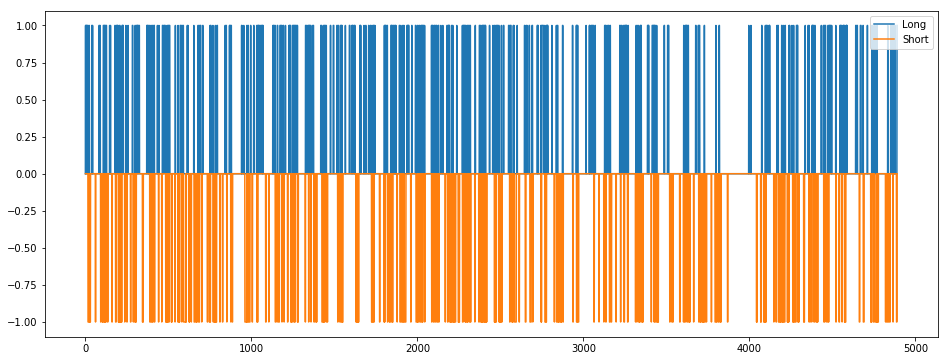

In [269]:
plt.figure(figsize=(16,6))
plt.plot(predictions_long,label = 'Long')
plt.plot(-predictions_short,label = 'Short')
plt.legend()

In [270]:
predictions_long.shape,predictions_short.shape

((4890,), (4890,))

In [272]:
backtest = pd.DataFrame()
backtest['Close_eurusd'] = df.iloc[-4890:,8]
backtest['long'] = predictions_long
backtest['short'] = predictions_short
backtest.head()

,Close_eurusd,long,short
Date,,,
20190221 11:00:00,1.133405,0,0
20190221 11:15:00,1.133390,1,0
20190221 11:30:00,1.133845,0,0
20190221 11:45:00,1.134440,1,0
20190221 12:00:00,1.134775,1,0


In [273]:
#backtest = backtest.iloc[bloc1:,:]
backtest.head()

,Close_eurusd,long,short
Date,,,
20190221 11:00:00,1.133405,0,0
20190221 11:15:00,1.133390,1,0
20190221 11:30:00,1.133845,0,0
20190221 11:45:00,1.134440,1,0
20190221 12:00:00,1.134775,1,0


In [274]:
backtest['long'].sum(),backtest['short'].sum()

(772, 738)

In [275]:
len(predictions_short),predictions_short.sum(),len(prediction_short),prediction_short.sum(),len(predictions_long),predictions_long.sum(),len(prediction_long),prediction_long.sum()

(4890, 738, 4890, 4890.0, 4890, 772, 4890, 4889.9995)

In [276]:
backtest.shape

(4890, 3)

In [277]:
#backtest = backtest.iloc[4800:,:]

In [278]:
backtest.head()

,Close_eurusd,long,short
Date,,,
20190221 11:00:00,1.133405,0,0
20190221 11:15:00,1.133390,1,0
20190221 11:30:00,1.133845,0,0
20190221 11:45:00,1.134440,1,0
20190221 12:00:00,1.134775,1,0


In [279]:
backtest['long'].sum(),backtest['short'].sum()

(772, 738)

In [281]:
long_pos = 0
short_pos = 0
equity = 100000
price_buy_long = 0
price_buy_short = 0
equity_list = []
nb_transaction = 0
col_profit = []
max_gain = (0,0)
max_loss = (0,0)
stop_loss_short = 0.011
stop_loss_long = -0.013
ticket = 100000
target_long = 0.003
target_short = -0.003
longueur = (backtest.shape[0])-1
long_exit = []
short_exit = []
long_sl = []
short_sl = []
go_long = []
go_short = []
lea = 0
sea = 0
gain_sum = 0
loss_sum = 0

print("Boucle de backtest initiée!")

import sys
orig_stdout = sys.stdout
f = open('backtestv2_5.txt', 'w')
sys.stdout = f

for i in range(0,longueur):
    
    if backtest.iloc[i,1] == 2 and long_pos == 0:
        long_pos = 1
        nb_transaction += 1
        price_buy_long = backtest.iloc[i,0]
        equity = equity - 1.5
        equity_list.append(equity)
        col_profit.append(0)
        go_long.append(1)
        print('\n Go Long enclenché le ',backtest.index[i],' pour $',price_buy_long)
        print('Nouvel equity :',equity)
        
    elif backtest.iloc[i,1] == 1 and long_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', On maintient la position long ouverte')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and long_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_long) > target_long:
            print('\n close de position long le ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print('variation des deux ', backtest.iloc[i,0] - price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*ticket)
            equity = equity - 1.5 + ((backtest.iloc[i,0] - price_buy_long) * ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_exit.append(1)
            col_profit.append(( backtest.iloc[i,0] - price_buy_long) * ticket)
            if ((backtest.iloc[i,0] - price_buy_long) * ticket) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
                
            #elif ((backtest.iloc[i,0] - price_buy_long) * ticket) < max_loss[1]:
             #   max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
            equity_list.append(equity)
            gain_sum = gain_sum + (backtest.iloc[i,0] - price_buy_long)*ticket
            long_pos = 0
        
        elif (backtest.iloc[i,0] - price_buy_long) < stop_loss_long:
            equity = equity - 1.5 + ((backtest.iloc[i,0] - price_buy_long) * ticket)
            print('\n sortie stop_loss du long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_long) * ticket))
            #if ((backtest.iloc[i,0] - price_buy_long) * ticket) > max_gain[1]:
                #max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
                
            if ((backtest.iloc[i,0] - price_buy_long) * ticket)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
            equity_list.append(equity)
            long_pos = 0
            loss_sum = loss_sum + abs(( backtest.iloc[i,0] - price_buy_long)*ticket)
        
    elif backtest.iloc[i,1] == 0 and long_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
            
for i in range(0,longueur):
    
    if backtest.iloc[i,2] == 1 and short_pos == 0:
        short_pos = 1
        nb_transaction += 1
        price_buy_short = backtest.iloc[i,0]
        equity = equity - 1.5
        equity_list.append(equity)
        col_profit.append(0)
        go_short.append(1)
        print('\n Short on le ',backtest.index[i],' pour $',price_buy_short)
        print('Le nouvel equity est de :',equity,'$')
        
    elif backtest.iloc[i,2] == 1 and short_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', on reste en position Short')
        col_profit.append(0)
    
    elif backtest.iloc[i,2] == 0 and short_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_short) < target_short:
            print('\n sortie du position short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_short)*ticket)
            equity = equity - 1.5 + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_exit.append(1)
            col_profit.append(abs((( backtest.iloc[i,0] - price_buy_short) * ticket)))
            if abs((backtest.iloc[i,0] - price_buy_short) * ticket) > max_gain[1]:
                max_gain = (i,abs((backtest.iloc[i,0] - price_buy_short) * ticket))
                
            #elif ((backtest.iloc[i,0] - price_buy_short) * ticket)< max_loss[1]:
             #   max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * ticket))
            equity_list.append(equity)
            short_pos = 0
            gain_sum = gain_sum + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
        
        elif (backtest.iloc[i,0] - price_buy_short) > stop_loss_short:
            equity = equity - 1.5 - abs((backtest.iloc[i,0] - price_buy_short)* ticket)
            print('\n sortie stop_loss du short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',-(backtest.iloc[i,0] - price_buy_short)*ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_sl.append(1)
            col_profit.append(-((backtest.iloc[i,0] - price_buy_short) * ticket))
            #if ((backtest.iloc[i,0] - price_buy_short) * ticket) > max_gain[1]:
             #   max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * ticket))
                
            if (-(backtest.iloc[i,0] - price_buy_short) * ticket)< max_loss[1]:
                max_loss = (i,(-(backtest.iloc[i,0] - price_buy_short) * ticket))
            equity_list.append(equity)
            short_pos = 0
            loss_sum = loss_sum + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
        
    elif backtest.iloc[i,2] == 0 and short_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)    


if long_pos == 1 :
    print("Sortie d'une position long en l'air")
    equity = equity - 1.5 + ((backtest.iloc[longueur,0]- price_buy_long) * ticket)
    lea = 1
if short_pos == 1 :
    print("Sortie d'une position short en l'air")
    equity = equity - 1.5 + ((backtest.iloc[longueur,0]- price_buy_short) * ticket)
    sea = 1
    
            
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",round(equity-100000),'!. En ',nb_transaction,' transactions.' )
f.close()
sys.stdout = orig_stdout
print('Boucle terminée')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",round(equity-100000),'!. En ',nb_transaction,' transactions.' )


Boucle de backtest initiée!
Boucle terminée

  Les gains faramineux s'élèvent à : $ 1547.0 !. En  39  transactions.


In [169]:
longueur_long = (backtest.shape[0])-1

In [170]:
backtest.iloc[longueur,2]

1

In [171]:
len(equity_list),backtest['long'].sum(),nb_transaction,equity-100000,backtest['short'].sum()

(5223, 776, 65, 1610.5000000000437, 769)

gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [172]:
len(equity_list),len(col_profit)

(5223, 5223)

In [173]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

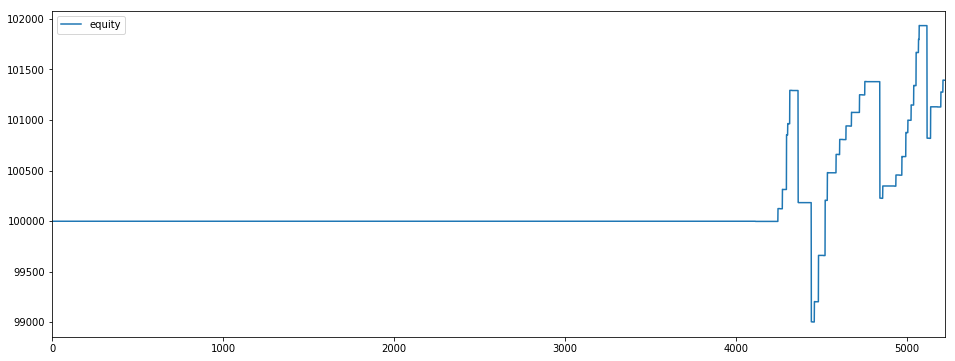

In [174]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot()
plt.legend()

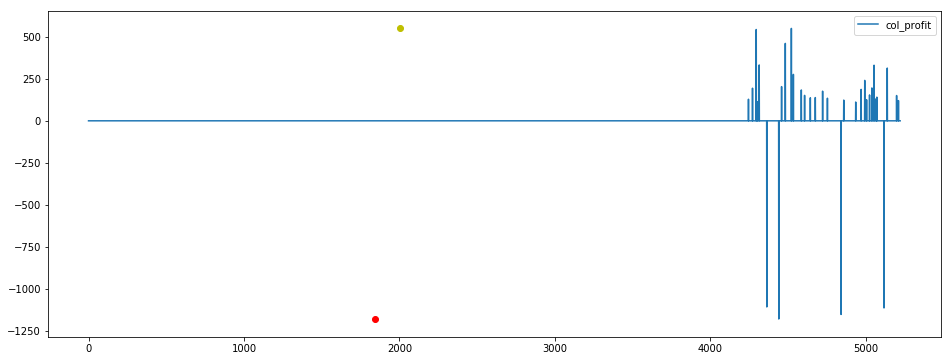

In [175]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [176]:
cumul_profit = sum(col_profit)
nul_profit = col_profit.count(0)
len_profit = len(col_profit)

In [177]:
print('Période testée :')
print('Début : ',backtest.index[0])
print('Fin : ',backtest.index[-1])
print('ROC long : ',round(roc_long*100,2),'%')
print('ROC short : ',round(roc_short*100,2),'%')
print('Transaction à $100,000')
print('Equity initiale : $100,000')
print('Equity finale : ',round(equity,2))
print('Gain généré :',round(equity-100000,2),'$')
print('Nombre de transactions : ',nb_transaction)
print('Nombre de Long : ',sum(go_long))
print('Nombre de Short : ',sum(go_short))
print('Nombre winners : ',sum(long_exit) + sum(short_exit))
print('Nombre loosers : ',sum(long_sl) + sum(short_sl))
print('Nombre de long winners : ',sum(long_exit))
print('Nombre de short winners : ',sum(short_exit))
print('Nombre de long loosers : ',sum(long_sl))
print('Nombre de short loosers : ',sum(short_sl))
print("Nombre de short en l'air : ", sea)
print("Nombre long en l'air : ",lea)
print('Fees : ',nb_transaction*150)
#print('Nombre de positions gagnées',sum(col_is_win))
#print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',round(((equity-100000)/(nb_transaction/2)),2))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Période testée :
Début :  20190221  10:15:00
Fin :  20190505  23:30:00
ROC long :  83.09 %
ROC short :  86.47 %
Transaction à $100,000
Equity initiale : $100,000
Equity finale :  101610.5
Gain généré : 1610.5 $
Nombre de transactions :  65
Nombre de Long :  0
Nombre de Short :  33
Nombre winners :  28
Nombre loosers :  4
Nombre de long winners :  0
Nombre de short winners :  28
Nombre de long loosers :  0
Nombre de short loosers :  4
Nombre de short en l'air :  1
Nombre long en l'air :  0
Fees :  9750
Gain maximal 548.5   548.5
Perte maximale -1176.5   -1176.5
Moyenne du gain 49.55
Somme de tous les gains 6033.0
Somme de tous le loss 4542.0
profit factor 1.33


In [517]:
# save the model to disk
filename = 'finalized_model_long.sav'
pickle.dump(model_long, open(filename, 'wb'))
filename = 'finalized_model_short.sav'
pickle.dump(model_short, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)